# Number-Recognition 

### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Load the MNIST dataset
 

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Build the neural network model 

In [4]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),keras.layers.Dense(128, activation='relu'),keras.layers.Dropout(0.2),keras.layers.Dense(10)])

####  Compile the model 

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [6]:
# Train the model and capture training history
history = model.fit(train_images, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.9042 - val_loss: 0.1550 - val_accuracy: 0.9555
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1562 - accuracy: 0.9543 - val_loss: 0.1161 - val_accuracy: 0.9653
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1164 - accuracy: 0.9648 - val_loss: 0.0980 - val_accuracy: 0.9708
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0941 - accuracy: 0.9709 - val_loss: 0.0902 - val_accuracy: 0.9727
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0809 - accuracy: 0.9745 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0898 - val_accuracy: 0.9731
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0790 - val_ac

#### Model evaluation 

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1477 - accuracy: 0.9801 - 594ms/epoch - 2ms/step

Test accuracy: 0.9800999760627747


####  Making Predictions

In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 1ms/step


#### Plotting Training and Validation Accuracy/Loss

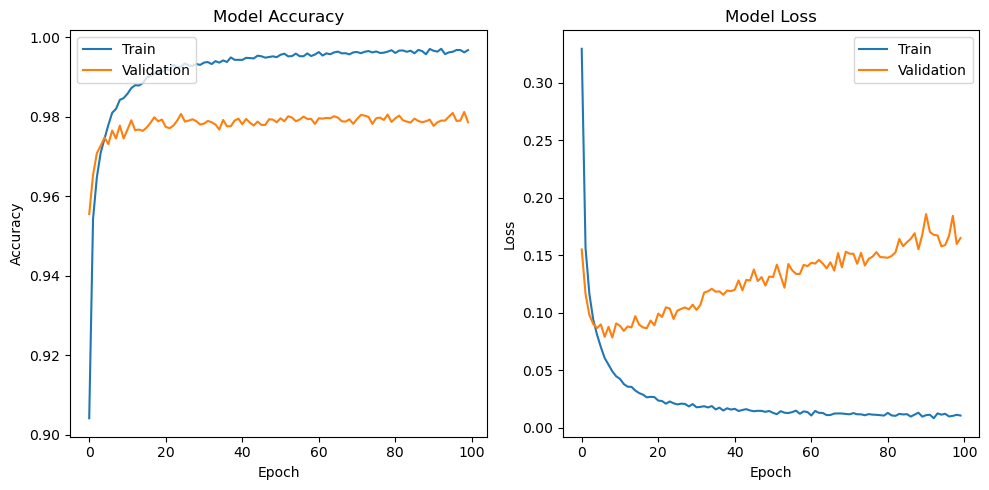

In [9]:
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()

plot_training_history(history)
plt.show()

####  Display a sample of predictions 

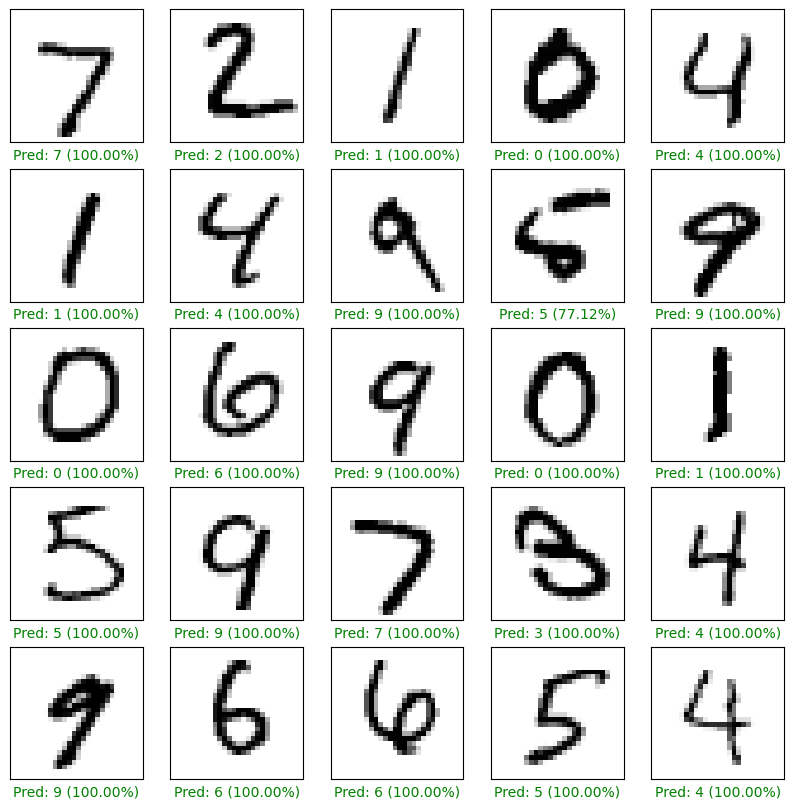

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label} ({100 * tf.reduce_max(predictions[i]):.2f}%)",
               color=color)
plt.show()

#### Conclusion

In [11]:
print("\nProject Conclusion:")
print("This project demonstrates the use of a neural network model for handwritten digit recognition using the MNIST dataset.")
print("Key Achievements:")
print("- Successfully trained a neural network to recognize handwritten digits.")
print(f"- Achieved a test accuracy of {test_acc * 100:.2f}% on the MNIST test dataset.")
print("The project also includes visualizations of the training history and sample predictions.")


Project Conclusion:
This project demonstrates the use of a neural network model for handwritten digit recognition using the MNIST dataset.
Key Achievements:
- Successfully trained a neural network to recognize handwritten digits.
- Achieved a test accuracy of 98.01% on the MNIST test dataset.
The project also includes visualizations of the training history and sample predictions.
